In [23]:
#Import packages
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
import os
import numpy as np
import pandas as pd
import xarray as xr

# Directory containing the data
data_dir = 'C:/Users/ifiri/Documents/PROYECTOS/2024_claudia_alzheimer/precuneus_data'
os.chdir(data_dir)

# List of files in the directory
files = sorted(os.listdir(data_dir))

# Initialize an empty list to hold the data
data_list = []

# Loop to read all the files
for file_name in files:
    file_path = os.path.join(data_dir, file_name)
    data = pd.read_csv(file_path, sep='\t', header=0)
    data_list.append(data.values)

# Convert the list to a 3D numpy array
data_3d = np.array(data_list)

# Add headers from the original data to data_3d
headers = data.columns

# Create the xarray DataArray
data_array = xr.DataArray(data_3d, dims=['subject', 'timepoint', 'struc'], 
                          coords={'subject': [f'Subject{i:03d}' for i in range(1, len(data_3d) + 1)], 
                                  'timepoint': np.arange(np.shape(data_3d)[1]), 
                                  'struc': headers})

# Initialize an empty list to hold the correlation matrices
correlation_matrices = []

# Loop over all subjects to compute correlation matrices
for sub in data_array.subject.values:
    specific_subject_data = data_array.sel(subject=sub)
    specific_subject_df = specific_subject_data.to_pandas()
    correlation_matrix = specific_subject_df.corr()
    correlation_matrices.append(correlation_matrix.values)

# Convert the list of correlation matrices to a 3D numpy array
correlation_3d = np.array(correlation_matrices)

# Create coordinates for the new DataArray
corr_coords = {
    'subject': [f'Subject{i:03d}' for i in range(1, len(correlation_3d) + 1)],
    'struc1': headers,
    'struc2': headers
}

# Create the xarray DataArray for the correlation matrices
correlation_data_array = xr.DataArray(correlation_3d, dims=['subject', 'struc1', 'struc2'], coords=corr_coords)

# Convert to xarray Dataset if needed
correlation_dataset = xr.Dataset({'correlation_matrix': correlation_data_array})

# Print the dataset to check
print(correlation_dataset)


<xarray.Dataset> Size: 2MB
Dimensions:             (subject: 57, struc1: 62, struc2: 62)
Coordinates:
  * subject             (subject) <U10 2kB 'Subject001' ... 'Subject057'
  * struc1              (struc1) object 496B 'atlas.MedFC' ... 'atlas.Accumbens'
  * struc2              (struc2) object 496B 'atlas.MedFC' ... 'atlas.Accumbens'
Data variables:
    correlation_matrix  (subject, struc1, struc2) float64 2MB 1.0 0.4786 ... 1.0


In [16]:
# Access a specific value
subject_id = 'Subject001'
timepoint = 1
structure = 'atlas.Precuneous'

specific_value = data_3d.sel(subject=subject_id, timepoint=timepoint, struc=structure).item()
print(f"The value for {subject_id}, timepoint {timepoint}, structure '{structure}' is {specific_value}.")

The value for Subject001, timepoint 1, structure 'atlas.Precuneous' is 0.071413866083332.


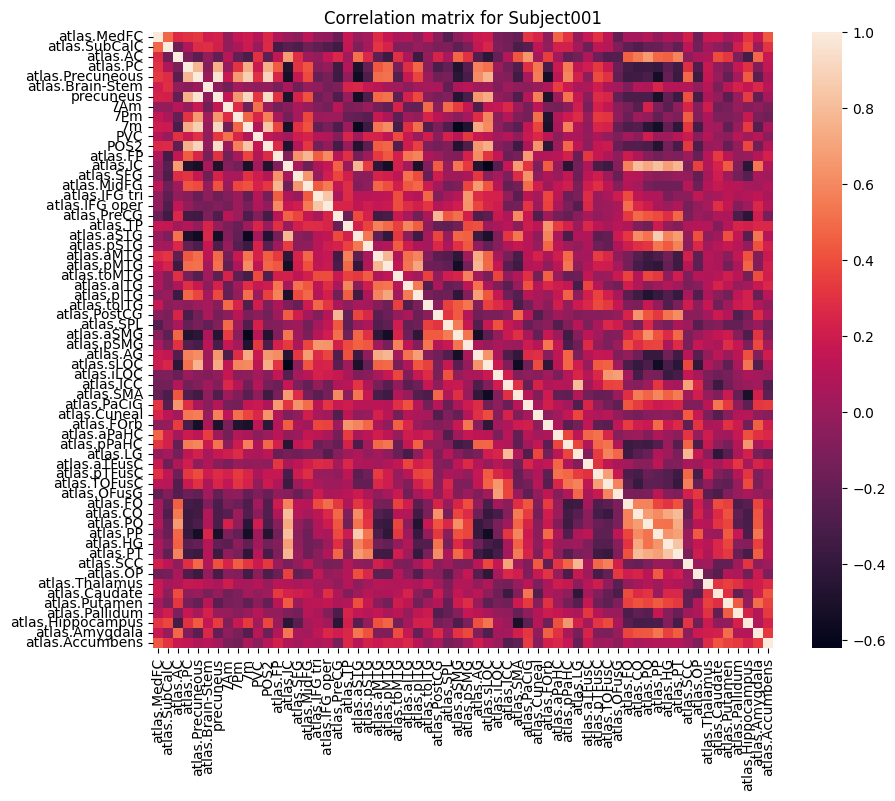

In [31]:
# plot a heatmap of a specific subject matrix in correlation_3d
sub = 'Subject001'
subject_matrix = correlation_data_array.sel(subject=sub)
plt.figure(figsize=(10, 8))
sns.heatmap(subject_matrix,  xticklabels=headers, yticklabels=headers)
plt.title(f'Correlation matrix for {data_array.subject.values[subject_index]}')
plt.show()


In [ ]:
# Access a specific structure
structure = 'atlas.Precuneous'

# Select the data for the specified structure
specific_structure_data = data_3d.sel(struc=structure)
print(f"Data for structure '{structure}':\n", specific_structure_data)

Structures interested in: (1) precuneus	(2) 7Am	(3) 7Pm	(4) 7m	(5) PVC (6) POS2